[View in Colaboratory](https://colab.research.google.com/github/isabella523/Used-Car-Project/blob/master/Used_Car_Project_Exploratory_analysis.ipynb)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving all.csv to all.csv
User uploaded file "all.csv" with length 719993 bytes


In [4]:
import io

dataset= pd.read_csv(io.StringIO(uploaded['all.csv'].decode('utf-8')))

In [5]:
dataset.head(5)

,Brand,Class,Model,Year,Color,Color_Classify,Engine,Location,Mileage,Price,Owner,Accident,Dealer,Dealer_Rating,City_MPG,Highway_MPG
0,BMW,3-Series,328i Sedan RWD,2014,Alpine White,white,I4,GA,96228.0,14000.0,4.0,0,Baranco Auto Motive,5.0,23.0,35.0
1,BMW,3-Series,320i xDrive Sedan AWD,2014,Mineral Gray Metallic,grey,I4,GA,41995.0,16895.0,NaN,1,Rick Hendrick Chrysler Dodge Jeep Ram Duluth,4.8,NaN,NaN
2,BMW,3-Series,328i Convertible RWD,2013,Red,red,I6,GA,60570.0,18999.0,2.0,0,Grand Motorcars,4.5,18.0,27.0
3,BMW,3-Series,328i xDrive Wagon AWD,2014,Mineral Gray Metallic,grey,I4,GA,33158.0,26990.0,NaN,0,Momentum Motorcars,4.5,22.0,33.0
4,BMW,3-Series,328d xDrive Sedan AWD,2014,Black,black,I4 Diesel,GA,65469.0,17981.0,NaN,0,Global Imports BMW,4.7,NaN,NaN


In [6]:
dataset.shape

(6830, 16)

In [7]:
dataset.dtypes

Brand              object
Class              object
Model              object
Year                int64
Color              object
Color_Classify     object
Engine             object
Location           object
Mileage           float64
Price             float64
Owner             float64
Accident           object
Dealer             object
Dealer_Rating     float64
City_MPG          float64
Highway_MPG       float64
dtype: object

In [8]:
!pip install pandas_profiling
import pandas_profiling
pandas_profiling.ProfileReport(dataset)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87, in catch_config_error

Number of variables,16
Number of observations,6830
Total Missing (%),7.2%
Total size in memory,853.8 KiB
Average record size in memory,128.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [57]:
# Median Price For Each Class
dataset.groupby(['Class'])[['Price']].median()

,Price
Class,
3-Series,17995.0
C-Class,8477.5
E-Class,8500.0


In [52]:
# Split the dataset and count each class
df_3=dataset.loc[dataset['Class'] == '3-Series']
df_3.shape

(3169, 16)

In [55]:
df_3['Price'].describe()

count     3044.000000
mean     18838.306505
std       4248.927414
min       8498.000000
25%      15988.750000
50%      17995.000000
75%      20995.250000
max      44875.000000
Name: Price, dtype: float64

In [53]:
df_C=dataset.loc[dataset['Class'] == 'C-Class']
df_C.shape

(1984, 16)

In [56]:
df_C['Price'].describe()

count     1824.000000
mean      8406.041118
std       2556.280037
min       1800.000000
25%       6499.000000
50%       8477.500000
75%       9995.000000
max      20977.000000
Name: Price, dtype: float64

In [54]:
df_E=dataset.loc[dataset['Class'] == 'E-Class']
df_E.shape

(1677, 16)

In [58]:
df_E['Price'].describe()

count     1677.000000
mean      8744.712582
std       2474.585586
min       2195.000000
25%       6995.000000
50%       8500.000000
75%       9995.000000
max      29995.000000
Name: Price, dtype: float64

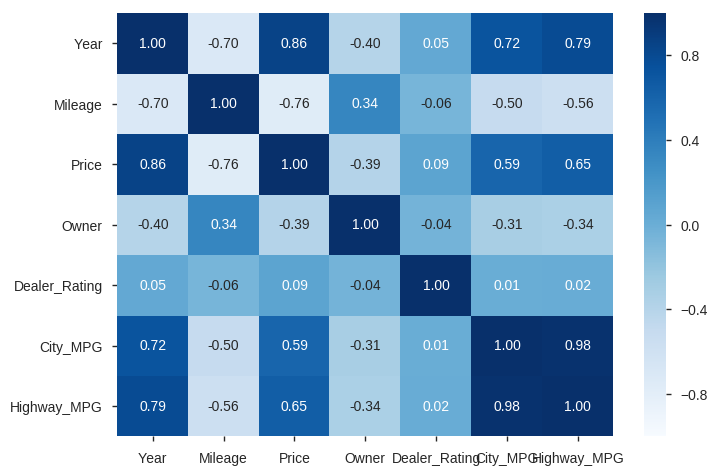

In [9]:
import matplotlib.pyplot as plt
g=sns.heatmap(dataset.corr(),annot=True, fmt='.2f',cmap='Blues')